# HW5

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter

import numpy as np
import scipy as sp
import pandas as pd
import nltk
import string
from collections import OrderedDict


####We might not need all of these####
import sklearn
from sklearn import datasets, feature_selection, cluster, feature_extraction
from sklearn import neighbors, decomposition, metrics, preprocessing
from sklearn import cross_validation, grid_search 
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import MDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from IPython import display
from PIL import Image
import os
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

#######################################

# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
set2_colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']

bold_colors = ['#FF0000', '#00FF00', '#FFAAAA', '#0000FF']
light_colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#00FF00']
cmap_light = ListedColormap(light_colors)
cmap_bold = ListedColormap(bold_colors)
dark2_cmap = ListedColormap(dark2_colors)
set2_cmap = ListedColormap(dark2_colors)
light_grey = np.array([float(248)/float(255)]*3)
shade_black = '#262626'

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 16
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

######################################
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
def cible_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Make a target axis at 0,0 with ticks along the axis lines
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()



# Using AFINN library - pip install afinn
from afinn import Afinn

# Load the NLTK punkt tokenizer - uncomment the next line if you don't have the punkt tokenizer 
# installed - it will open a dialog that will allow you to do so.
#nltk.download()


In [44]:
# Read in Shakespeare's plays
df = pd.read_pickle('data.pickle')

In [45]:
#print(afinn_scores)
print(df.shape)
print(df['Utterance'][3])
#df['Utterance'] = df['Utterance'] + ""
print(df['Utterance'][3])

(30919, 5)
I'll set a bourn how far to be beloved. 
I'll set a bourn how far to be beloved. 


In [46]:
df.describe

<bound method NDFrame.describe of            Play  Act  Scene             Speaker  \
0       a_and_c  0.0    0.0               PHILO   
1       a_and_c  0.0    0.0           CLEOPATRA   
2       a_and_c  0.0    0.0         MARK ANTONY   
3       a_and_c  0.0    0.0           CLEOPATRA   
4       a_and_c  0.0    0.0         MARK ANTONY   
5       a_and_c  0.0    0.0           Attendant   
6       a_and_c  0.0    0.0         MARK ANTONY   
7       a_and_c  0.0    0.0           CLEOPATRA   
8       a_and_c  0.0    0.0         MARK ANTONY   
9       a_and_c  0.0    0.0           CLEOPATRA   
10      a_and_c  0.0    0.0         MARK ANTONY   
11      a_and_c  0.0    0.0           CLEOPATRA   
12      a_and_c  0.0    0.0         MARK ANTONY   
13      a_and_c  0.0    0.0           CLEOPATRA   
14      a_and_c  0.0    0.0         MARK ANTONY   
15      a_and_c  0.0    0.0           DEMETRIUS   
16      a_and_c  0.0    0.0               PHILO   
17      a_and_c  0.0    0.0           DEMETRIUS 

In [47]:
dfAllPlays = df[['Speaker','Utterance']]
dfAllPlays = dfAllPlays.groupby(['Speaker']).agg({'Utterance':'sum'})
dfAllPlays.reset_index(inplace=True)
dfAllPlays 
dfAllPlays['Speaker'][414]
dfAllPlays['Utterance'][414]
#dfAllPlays.shape

"  A little more than kin, and less than kind. Not so, my lord; I am too much i' the sun. Ay, madam, it is common. Seems, madam! nay it is; I know not 'seems.' 'Tis not alone my inky cloak, good mother, Nor customary suits of solemn black, Nor windy suspiration of forced breath, No, nor the fruitful river in the eye, Nor the dejected 'havior of the visage, Together with all forms, moods, shapes of grief, That can denote me truly: these indeed seem, For they are actions that a man might play: But I have that within which passeth show; These but the trappings and the suits of woe. I shall in all my best obey you, madam. O, that this too too solid flesh would melt Thaw and resolve itself into a dew! Or that the Everlasting had not fix'd His canon 'gainst self-slaughter! O God! God! How weary, stale, flat and unprofitable, Seem to me all the uses of this world! Fie on't! ah fie! 'tis an unweeded garden, That grows to seed; things rank and gross in nature Possess it merely. That it should c

In [48]:
dfAllPlays['Utterance'] = dfAllPlays.Utterance.str.replace("[^a-zA-Z]", " ",)  #Remove all punctuations/numbers. 

dfAllPlays['Utterance'][414]

'  A little more than kin  and less than kind  Not so  my lord  I am too much i  the sun  Ay  madam  it is common  Seems  madam  nay it is  I know not  seems    Tis not alone my inky cloak  good mother  Nor customary suits of solemn black  Nor windy suspiration of forced breath  No  nor the fruitful river in the eye  Nor the dejected  havior of the visage  Together with all forms  moods  shapes of grief  That can denote me truly  these indeed seem  For they are actions that a man might play  But I have that within which passeth show  These but the trappings and the suits of woe  I shall in all my best obey you  madam  O  that this too too solid flesh would melt Thaw and resolve itself into a dew  Or that the Everlasting had not fix d His canon  gainst self slaughter  O God  God  How weary  stale  flat and unprofitable  Seem to me all the uses of this world  Fie on t  ah fie   tis an unweeded garden  That grows to seed  things rank and gross in nature Possess it merely  That it should c

In [49]:
dfAllPlays

,Speaker,Utterance
0,A Lord,Sir it was I
1,A Patrician,This man has marr d his fortune You do the no...
2,AARON,Now climbeth Tamora Olympus top Safe out of ...
3,ABERGAVENNY,I cannot tell What heaven hath given him let...
4,ABHORSON,Do you call sir A bawd sir fie upon him h...
5,ABRAHAM,Do you bite your thumb at us sir Do you bite...
6,ACHILLES,Why how now Ajax wherefore do you thus How...
7,ADAM,Yonder comes my master your brother Sweet ma...
8,ADRIAN,Though this island seem to be desert Uninha...
9,ADRIANA,Neither my husband nor the slave return d Tha...


In [50]:
porter = PorterStemmer()
def tokenizer_porter(text):
    #for word in text.split():
    #    print(word, porter.stem(word))
    return [porter.stem(word) for word in text.split()]

all_stopwords = stopwords.words('english') 
#adding Shakespeare-ean stop-words
shaksp_stopwords = ('thee', 'thou', 'thy', 'thine')
all_stopwords += shaksp_stopwords
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [51]:
#TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer(tokenizer = tokenizer_porter,
                             stop_words=all_stopwords,
                             use_idf=False,
                             max_features = 500,ngram_range=(1,1))
train_data_features = vectorizer.fit_transform(dfAllPlays.Utterance.values)
train_data_features = train_data_features.A #toarray()  
vocab = vectorizer.get_feature_names()

In [52]:
#vocab
train_data_features

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01150033,  0.01150033,  0.        , ...,  0.        ,
         0.034501  ,  0.01150033],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.1393466 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [53]:
df = pd.DataFrame()
df = pd.DataFrame(data=train_data_features,columns=vocab)
df

,affect,age,ah,air,ala,almost,alon,ani,anoth,answer,...,write,wrong,ye,yea,year,yet,yield,york,young,youth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.011500,0.011500,0.000000,0.000000,0.000000,0.034501,0.000000,0.011500,0.046001,0.000000,...,0.000000,0.000000,0.115003,0.000000,0.000000,0.057502,0.000000,0.000000,0.034501,0.011500
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023796,0.023796,0.023796,...,0.000000,0.000000,0.000000,0.023796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.136364,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045455,0.090909,0.181818,0.000000,0.000000,0.045455,0.090909
8,0.000000,0.000000,0.000000,0.204124,0.000000,0.204124,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.000000,0.000000,0.000000,0.000000
9,0.013758,0.013758,0.041274,0.000000,0.013758,0.000000,0.041274,0.027516,0.000000,0.000000,...,0.000000,0.068791,0.000000,0.013758,0.000000,0.041274,0.000000,0.000000,0.000000,0.000000


In [54]:
CS_dist = 1 - cosine_similarity(train_data_features)
Euclid_dist = euclidean_distances(train_data_features)

num_samples, num_features = train_data_features.shape
print ("num_samples:  %d, num_features: %d" %(num_samples,num_features))

num_samples:  971, num_features: 500


In [55]:
print(df.shape, Euclid_dist.shape, CS_dist.shape)

(971, 500) (971, 971) (971, 971)


In [56]:
df.head()

,affect,age,ah,air,ala,almost,alon,ani,anoth,answer,...,write,wrong,ye,yea,year,yet,yield,york,young,youth
0,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000
1,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000
2,0.0115,0.0115,0.0,0.0,0.0,0.034501,0.0,0.0115,0.046001,0.0,...,0.0,0.0,0.115003,0.0,0.0,0.057502,0.0,0.0,0.034501,0.0115
3,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000
4,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000


In [57]:
df.describe()

,affect,age,ah,air,ala,almost,alon,ani,anoth,answer,...,write,wrong,ye,yea,year,yet,yield,york,young,youth
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,...,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,0.003370,0.004227,0.003315,0.005656,0.005744,0.004376,0.004504,0.020533,0.007259,0.013134,...,0.003930,0.008014,0.014946,0.005092,0.006886,0.035512,0.005446,0.004893,0.009255,0.006516
std,0.012362,0.014336,0.018946,0.022415,0.021973,0.019160,0.016854,0.048917,0.020020,0.044297,...,0.020120,0.027731,0.045720,0.023464,0.021997,0.055936,0.021971,0.024315,0.023393,0.021190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024142,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.064282,0.000000,0.000000,0.000000,0.000000
max,0.140028,0.160128,0.332182,0.301511,0.288675,0.277350,0.277350,0.707107,0.235702,0.707107,...,0.377964,0.577350,0.707107,0.447214,0.258199,0.603023,0.280056,0.305910,0.251976,0.213201


### Computing MDS coefficients
Here we use MDS for the dimension reduction of the features. In particular we used cosine similarity of the TF-IDF matrix (transformed to dissimilarity) for the calculation of distances (as our metric for di/similarity).

In [58]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=99)
text_MDS = mds.fit_transform(CS_dist)  # shape (n_components, n_samples)
text_MDS.shape

(971, 2)

In [59]:
text_MDS

array([[ 0.70767661,  0.02800592],
       [-0.622215  , -0.13795937],
       [-0.21137219,  0.06208378],
       ..., 
       [-0.31314487,  0.70558407],
       [ 0.29567355, -0.30086567],
       [ 0.4318226 ,  0.64740777]])

After applying MDS we obtained reduced dimension of the features. We reduce the number of dimensions to 2 in order to be able to obtain visualization. 
<br />
We proceeded by clustering of TF-IDF vectors by using K-Means python implementation as shown bellow.

Performing K-Means on the TF-IDF matrix with the K++ initialisation and 2 clusters.

In [60]:
MAX_CLUSTERS = 2
kmeans = KMeans(init='k-means++', n_clusters=MAX_CLUSTERS, n_init=10)
kmeans.fit(train_data_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
df

,affect,age,ah,air,ala,almost,alon,ani,anoth,answer,...,write,wrong,ye,yea,year,yet,yield,york,young,youth
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.011500,0.011500,0.000000,0.000000,0.000000,0.034501,0.000000,0.011500,0.046001,0.000000,...,0.000000,0.000000,0.115003,0.000000,0.000000,0.057502,0.000000,0.000000,0.034501,0.011500
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023796,0.023796,0.023796,...,0.000000,0.000000,0.000000,0.023796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.136364,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045455,0.090909,0.181818,0.000000,0.000000,0.045455,0.090909
8,0.000000,0.000000,0.000000,0.204124,0.000000,0.204124,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.204124,0.000000,0.000000,0.000000,0.000000
9,0.013758,0.013758,0.041274,0.000000,0.013758,0.000000,0.041274,0.027516,0.000000,0.000000,...,0.000000,0.068791,0.000000,0.013758,0.000000,0.041274,0.000000,0.000000,0.000000,0.000000


In [62]:
df['KM_cluster'] = kmeans.predict(train_data_features)
#df['KM_cluster']

In [63]:
# Set the cluster names
cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
df['KM_cluster'].replace(cluster_names, inplace=True)
#df['KM_cluster']
#list(df.columns.values)

In [64]:
print("\nTotal nummber of clusters and composition: ")
print (df['KM_cluster'].value_counts()[::-1])
print("\nSilhouette Coefficient: %0.3f"
      % metrics.silhouette_score(train_data_features, kmeans.labels_, sample_size=1000))


Total nummber of clusters and composition: 
Cluster 2    442
Cluster 1    529
Name: KM_cluster, dtype: int64

Silhouette Coefficient: 0.089


<b>Visualization trough Multidimensional Scaling</b>

Using MDS cofficients we then create 2-D visualization.
In a sense we are mapping the data from higer dimensional space to 2-D space which enables us to vizualise it.

In [65]:
#Code to define default plot types for the scatterplots

def plot_2D(groups, title):
    plt.figure(figsize=(10,6))
    for name, group in groups:
        plt.scatter(group.dimension1, group.dimension2, alpha = 0.6, s=30, label=cluster_names[name], 
                    facecolor=dark2_colors[name], edgecolor=shade_black, linewidth=0.35)
    plt.ylabel('2nd Dimension' )
    plt.xlabel('1st Dimension' )
    plt.title(title)
    #plt.gca().xaxis.grid(True)
    legend = plt.legend(loc=3,frameon=True,framealpha=0.6, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.6)
    plt.gca().grid(False)
    remove_border(top=False, right=False, left=True, bottom=True)
    plt.show()

def plot_3D(groups, title, elevation=15, azimuth=150):
    fig = plt.figure(figsize=(10,6))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elevation, azim=azimuth)
    for name, group in groups:
        ax.scatter(group.dimension1, group.dimension2, group.dimension3, alpha = 0.6, s=30, label=cluster_names[name], 
                    facecolor=dark2_colors[name], edgecolor=shade_black, linewidth=0.35)
    ax.set_zlabel('3rd Dimension' )
    ax.set_ylabel('2nd Dimension' )
    ax.set_xlabel('1st Dimension' )
    ax.set_title(title)
    legend = ax.legend(loc=3,frameon=True,framealpha=0.6, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.2)
    plt.show()
    
def plot_2D_withlabels(df,groups, title):
    plt.figure(figsize=(10,6))
    for name, group in groups:
        plt.scatter(group.dimension1, group.dimension2, alpha = 0.6, s=30, label=cluster_names[name], 
                    facecolor=dark2_colors[name], edgecolor=shade_black, linewidth=0.35)
    for i in range(df.shape[0]):
        plt.text(df.ix[i]['dimension1'], df.ix[i]['dimension2'], df.ix[i]['title'], alpha = 0.8, color='grey', size=9)  
    plt.ylabel('2nd Dimension' )
    plt.xlabel('1st Dimension' )
    plt.title(title)
    legend = plt.legend(loc=3,frameon=True,framealpha=0.6, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.2)
    plt.gca().grid(False)
    remove_border(top=False, right=False, left=True, bottom=True)
    plt.show()

def make_plot_frame(proj, labels, cluster, title):
    get_shape = proj.shape[1]
    dimensions = ["Dimension"+str(i) for i in range(get_shape)]
    columns = ["dimension"+str(i+1) for i in range(get_shape)]
    columns.extend(["label", "cluster", "title"])
    data = np.column_stack((proj, labels, cluster, title))
    clustergroups = pd.DataFrame(data, columns = columns)
    return clustergroups

In [66]:
#df
df.loc[:,"all_plays_index"] = dfAllPlays.index.values

<b>Now we are plotting the clusters</b>

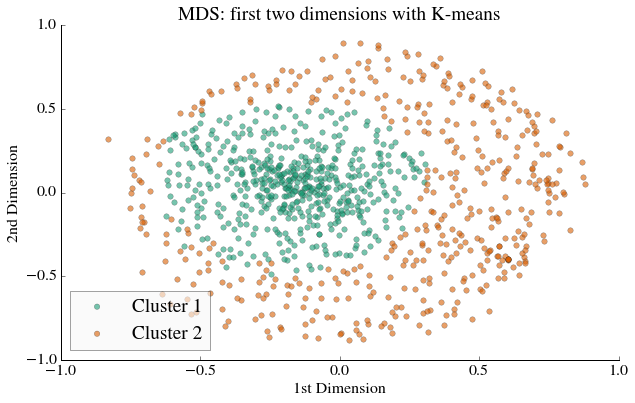

In [67]:
df1 = make_plot_frame(text_MDS, kmeans.labels_, df.loc[:,"KM_cluster"],df.loc[:,"all_plays_index"])
clusterGroups = df1.groupby('label')

# Plot the features with MDS  
plot_2D(clusterGroups, 'MDS: first two dimensions with K-means')  

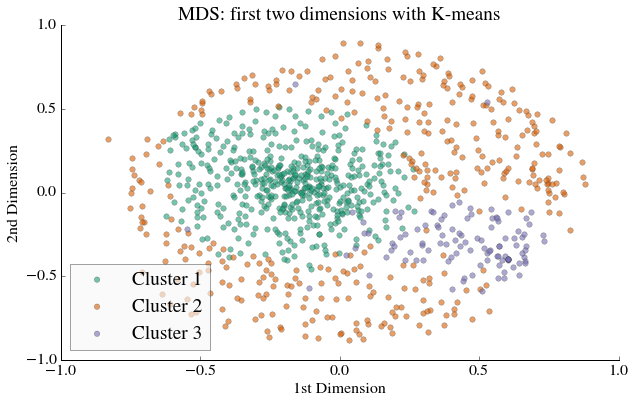

In [69]:
MAX_CLUSTERS = 3
kmeans = KMeans(init='k-means++', n_clusters=MAX_CLUSTERS, n_init=10)
kmeans.fit(train_data_features)

df['KM_cluster'] = kmeans.predict(train_data_features)
df['KM_cluster'].replace(cluster_names, inplace=True)
df.loc[:,"all_plays_index"] = dfAllPlays.index.values

df_3 = make_plot_frame(text_MDS, kmeans.labels_, df.loc[:,"KM_cluster"],df.loc[:,"all_plays_index"])
clusterGroups = df_3.groupby('label')

# Plot the features with MDS  
plot_2D(clusterGroups, 'MDS: first two dimensions with K-means')  

In [241]:
df['Character'] = dfAllPlays['Speaker']
df[['Character', 'KM_cluster']]

,Character,KM_cluster
0,A Lord,Cluster 1
1,A Patrician,Cluster 2
2,AARON,Cluster 2
3,ABERGAVENNY,Cluster 2
4,ABHORSON,Cluster 1
5,ABRAHAM,Cluster 1
6,ACHILLES,Cluster 2
7,ADAM,Cluster 2
8,ADRIAN,Cluster 1
9,ADRIANA,Cluster 2


In [242]:
afinn = Afinn()

# For every utterance, add a Valence score
afinn_scores = [afinn.score(text) for text in df.Utterance]

df['afinn'] = afinn_scores

AttributeError: 'DataFrame' object has no attribute 'Utterance'

## Differentiating comedies from tragedies

The paper first attempts to differentiate comedies from tragedies based on the summed valence for each play.

In [ ]:
awv = {}

for play in df.Play.unique():
    dfp = df[df['Play']==play]
    
    #Haris
    #print (play, df['Play'])
    #print ("dfp", dfp)

    # Sum the valences for each of the utterances
    sum_valence = dfp.afinn.sum()
    
    # Generate one big string for the full play
    alltext = ''
    for text in dfp['Utterance']:
        alltext += text + ' '
    
    
    # The following lines can be added if you wish to take into account the play's length
    #
    
    # Create a dictionary using a comprehension - this maps every character from
    # string.punctuation to None. Initialize a translation object from it.
    #translator = str.maketrans({key: None for key in string.punctuation})

    # Remove the punctuation using the translator
    #no_punctuation = alltext.translate(translator)
    
    # Split the play into tokens
    #tokens = nltk.word_tokenize(no_punctuation)

    # Calculate the number of words in the play
    #len_play = len(tokens)
    
    
    # Find the number of words in AFINN that are in the play
    words_in_afinn = afinn.find_all(alltext)


    # Calculate the average word valence
    # The paper seems to infer there are two methods to calculate it:
    # i) "Fig. 1. For each play the valence for each word was summed and then divided by the number
    # of words in both the word list (AFINN) and the respective play."
    # ii) "...  by summing the valence values for all words in the play and then dividing by the number 
    # of the play’s words in AFINN"
    #
    # We've chosen the later.
    awv[play] = (sum_valence / len(words_in_afinn)) 

    
# Define the list of tragedies and comedies in the order given in the paper
tragedies = ['titus','r_and_j', 'j_caesar', 'hamlet', 'othello', 'timon', 'lear', 'macbeth', 'a_and_c', 'coriolan']
comedies = ['all_well', 'as_you', 'com_err', 'lll', 'm_for_m', 'merchant', 'm_wives', 'dream', 'much_ado', 'pericles',
           'taming', 't_night', 'two_gent', 'win_tale']
all_labels = comedies + tragedies 

awv_sorted = OrderedDict()
for name in comedies:
    awv_sorted[name] = awv[name]
    
for name in tragedies:
    awv_sorted[name] = awv[name]

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)

bar=plt.bar(range(len(awv_sorted)), awv_sorted.values(), align='center', color='blue')

# Change the color of the tragedies to red
for i in range(len(comedies),len(comedies)+len(tragedies)):
    bar[i].set_color('red')

plt.xticks(range(len(all_labels)), all_labels)

ax = plt.axes()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

## Character-to-Character Analysis

The paper next attempts to determine the sentiment between characters. The character-to-character sentiment is determined by "summing the valence values over each instance of continuous speech and then assumed that sentiment was directed towards the character that spoke immediately before the current speaker." Our data structure is ordered by speaker and so we can simply iterate through it and calculate the valence.


In [ ]:
from_character = {}
speaker = ''
previous_speaker = ''

# We'll look at character interactions in Hamlet
dfp = df[df.Play=='hamlet']

# Iterate through all Utterances
for i, r in dfp.iterrows():

    # Determine who is speaking
    speaker = r['Speaker']

    # Only calculate if someone spoke before
    if len(previous_speaker) > 0:
        # Get the list of speakers that this speaker has spoken to
        if speaker in from_character:
            to_character = from_character[speaker]
        else:
            to_character = {}
            from_character[speaker] = to_character

        # Get the running total of sentiment valence so far and add the new valence
        if previous_speaker in to_character:
            to_character[previous_speaker] += r['afinn']
        else:
            to_character[previous_speaker] = r['afinn']

    # The current speaker will become the previous speaker for the next utterance
    previous_speaker = speaker

In [ ]:
# Print out Hamlet's Sentiment Valence Sum 
from IPython.display import display, HTML
df_print = pd.DataFrame(list(from_character['HAMLET'].items()), columns=['Speaker', 'Valence'])

df_print.sort_values('Valence',inplace=True, ascending=False)
display(df_print)

In [ ]:
# Print out Hamlet's Sentiment Valence Sum 

df_print2 = pd.DataFrame(list(from_character['GUILDENSTERN'].items()), columns=['Speaker', 'Valence'])

df_print2.sort_values('Valence',inplace=True, ascending=False)
display(df_print2)

In [ ]:
import networkx as nx

G=nx.Graph()

for i, r in df_print.iterrows():
    G.add_edge('HAMLET',r['Speaker'],weight=r['Valence'])


elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=500)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=10,font_family='sans-serif')

plt.axis('off')
plt.show() # display